In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import argparse
import pickle
from constants import *

# Set the font globally
# plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.family'] = 'Times New Roman'

def get_test_mrr(file_path):
    try:
        with open(file_path, 'r') as f:
            mrr = None
            for lines in f:
                if lines.startswith('\ttest AP'):
                    mrr = float(lines.strip('\n').split(':')[-1])
                    return mrr
    except FileNotFoundError:
        import pdb; pdb.set_trace()
        pass

def get_best_epoch(file_path):
    try:
        with open(file_path, 'r') as f:
            epoch = None
            for lines in f:
                if lines.startswith('Loading'):
                    epoch = int(lines.split(' ')[4])
                    return epoch
    except FileNotFoundError:
        import pdb; pdb.set_trace()
        pass


In [2]:
parser = argparse.ArgumentParser()
parser.add_argument('--res_path', type=str, default='', help='result file directory')
parser.add_argument('--layers', type=int, default=1, help='layer number')
parser.add_argument('--fontsize', type=int, default=32, help='font size')
parser.add_argument('--no_title', action='store_true')
parser.add_argument('--save_legends', action='store_true')

args = parser.parse_args(['--res_path', '../figures/data/syn_res'])
plt.rcParams['font.size'] = args.fontsize

alpha = [0.6, 0.7, 0.8, 0.9,]
beta = [0.4, 0.5, 0.6]

warm_colors = colors[:4]
cold_colors = colors[4:]

In [3]:
# load data
all_mrrs_gru = pd.DataFrame(columns=beta, index=alpha, data=np.zeros((len(alpha), len(beta))))
all_mrrs_emb = pd.DataFrame(columns=beta, index=alpha, data=np.zeros((len(alpha), len(beta))))
all_stds_gru = pd.DataFrame(columns=beta, index=alpha, data=np.zeros((len(alpha), len(beta))))
all_stds_emb = pd.DataFrame(columns=beta, index=alpha, data=np.zeros((len(alpha), len(beta))))
if os.path.exists(args.res_path):
    with open(args.res_path, 'r') as f:
        for lines in f:
            if lines.startswith('_syn'):
                mrr = float(lines.split(':')[-1].split('+-')[0])
                std = float(lines.split(':')[-1].split('+-')[1])
                a = float(lines.split('_')[2])
                b = float(lines.split('_')[3])
                if 'gru' in lines:
                    all_mrrs_gru.loc[a, b] = mrr
                    all_stds_gru.loc[a, b] = std
                else:
                    all_mrrs_emb.loc[a, b] = mrr
                    all_stds_emb.loc[a, b] = std
else:
    raise NotImplementedError

In [5]:
print(all_mrrs_gru)

        0.4     0.5     0.6
0.6  0.1977  0.2392  0.2963
0.7  0.2032  0.2126  0.2959
0.8  0.1866  0.2098  0.2590
0.9  0.1719  0.2090  0.2553


ValueError: If using all scalar values, you must pass an index

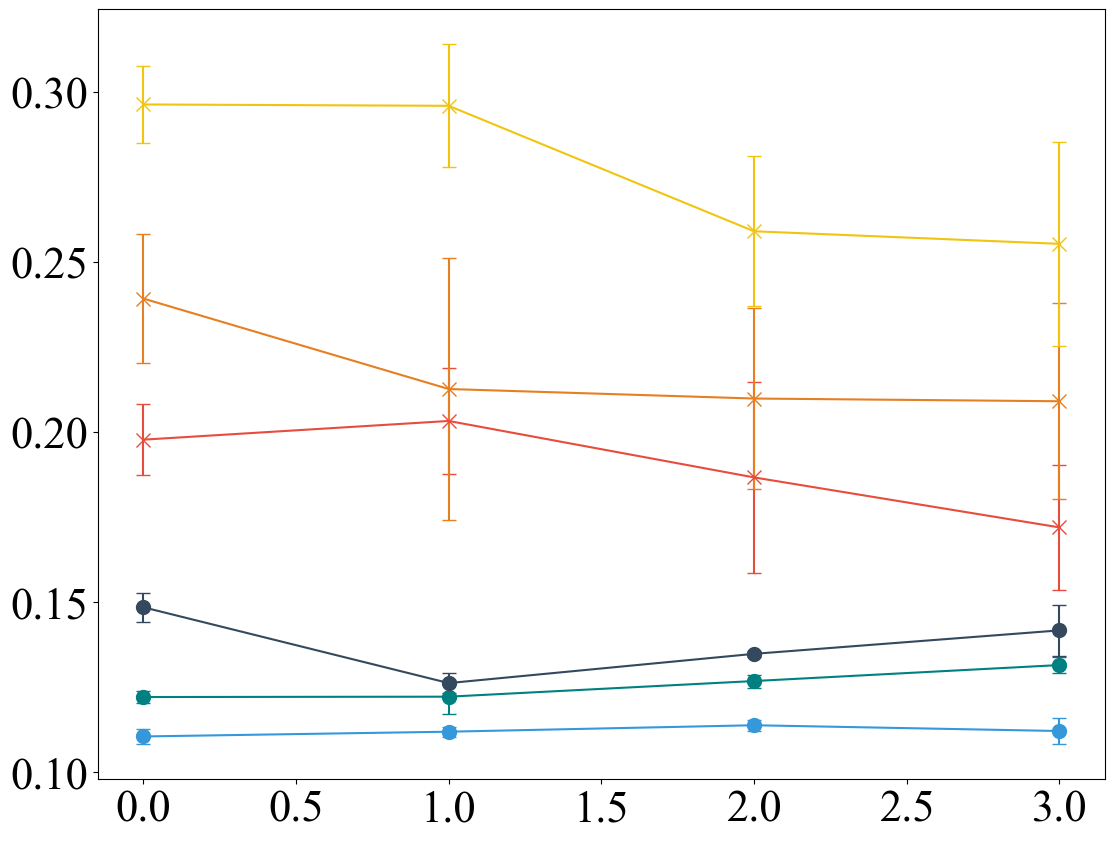

In [4]:

fig, ax = plt.subplots(1, 1, figsize=(13,10))

handles1 = []
handles2 = []
for i, c in enumerate(all_mrrs_gru.columns):
    handles1.append(ax.errorbar(x=range(len(alpha)), y=all_mrrs_gru[c], yerr=all_stds_gru[c], fmt='-x',  markersize=10,capsize=5, 
                               label=f'RNN, ' + r'$\beta=$' + f'{all_mrrs_gru.columns[i]}', color=warm_colors[i]))
for i, c in enumerate(all_mrrs_emb.columns):
    handles2.append(ax.errorbar(x=range(len(alpha)), y=all_mrrs_emb[c], yerr=all_stds_emb[c], fmt='-o',  markersize=10,capsize=5, 
                               label=f'emb, ' + r'$\beta=$' + f'{all_mrrs_emb.columns[i]}', color=cold_colors[i]))

# handles.append(ax.errorbar(x=range(len(scans)), y=results2, yerr=np.std(results2), fmt='--', capsize=5, label="", color=colors[i]))

handles = []
for i in range (3):
    handles.append(handles1[i])
    handles.append(handles2[i])
ax.set_xticks(ticks=np.arange(len(alpha)), labels=alpha)
ax.set_xlabel(r'$\alpha$', labelpad=-20)
ax.set_ylabel(f'MRR')
plt.legend(frameon=False, bbox_to_anchor=(0.5, -0.25), handles=handles, loc='center', ncol=len(handles1), borderaxespad=0, handlelength=0.)
plt.tight_layout()

plt.savefig(f'../figures/mrr_syn.pdf')



df_all = pd.concat([all_mrrs_gru, all_mrrs_emb, all_stds_gru, all_stds_emb], axis=1)
